In [1]:
# Import the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("C:/Users/vishal/loan.csv")

C:\Users\vishal\Anaconda4\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# TO get the null value
df.isnull().sum().head()

id                 0
member_id          0
loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
dtype: int64

In [6]:
# To get the null value in percentage
round(100*(df.isnull().sum()/len(df.index)),2).head()

id                 0.0
member_id          0.0
loan_amnt          0.0
funded_amnt        0.0
funded_amnt_inv    0.0
dtype: float64

In [7]:
# Drop the columns where the data is not available 100%
df =df.drop(['total_il_high_credit_limit','total_bc_limit','total_bal_ex_mort','tot_hi_cred_lim','percent_bc_gt_75',
           'pct_tl_nvr_dlq','num_tl_op_past_12m','num_tl_90g_dpd_24m','num_tl_30dpd','num_sats','num_rev_tl_bal_gt_0',
           'num_rev_accts','num_op_rev_tl','num_il_tl','num_bc_tl','num_bc_sats','num_actv_rev_tl','num_actv_bc_tl',
           'num_accts_ever_120_pd','mths_since_recent_revol_delinq','mths_since_recent_inq','mths_since_recent_bc_dlq',
           'mths_since_recent_bc','mort_acc','mo_sin_rcnt_tl','mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op'], axis=1)

In [8]:
# Drop the columns where the data is not available
df=df.drop(['num_tl_120dpd_2m','mo_sin_old_il_acct','bc_util','bc_open_to_buy','avg_cur_bal','acc_open_past_24mths',
           'inq_last_12m','total_cu_tl','inq_fi','total_rev_hi_lim','all_util','max_bal_bc','open_rv_24m','open_rv_12m',
           'il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m','tot_cur_bal',
           'tot_coll_amt','verification_status_joint','dti_joint','annual_inc_joint','mths_since_last_major_derog',
           'next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis=1)

In [9]:
# cheak those columns where the value is Null and there Count
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
revol_util                       50
last_pymnt_d                     71
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [10]:
# Remove the row data where title is not available (We are not able to recognized the name of particular title )
df=df.dropna(subset=['emp_title'])
# Drop the columns desc columns because for number entries are not available
df= df.drop('desc',axis=1)
# Remove the months from the term columns
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
df['emp_length'].replace('n/a', '0', inplace=True)

# Convert the data into numeric
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')

# Remove the months from the term columns
df['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
df['term'] = pd.to_numeric(df['term'], errors='coerce')

# Change the alphabat to the numerical value
df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
df['sub_grade'] = pd.to_numeric(df['sub_grade'], errors='coerce')

In [11]:
# Impute the value by mode
df['last_pymnt_d']=df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0])

# Impute the value by median
df['tax_liens']=df['tax_liens'].fillna(df['tax_liens'].median())
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())
df['chargeoff_within_12_mths']=df['chargeoff_within_12_mths'].fillna(df['chargeoff_within_12_mths'].median())
df['collections_12_mths_ex_med']=df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median())
df['emp_length']=df['emp_length'].fillna(df['emp_length'].median())

# Impute the value by Mode
df['title']=df['title'].fillna(df['title'].mode()[0])
df['revol_util']=df['revol_util'].fillna(df['revol_util'].mode()[0])

# Impute the value by Mode
df['title']=df['title'].fillna(df['title'].mode()[0])
df['revol_util']=df['revol_util'].fillna(df['revol_util'].mode()[0])

In [12]:
# The column int_rate is character type, let's convert it to float
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [13]:
#df.info()

In [14]:
df.select_dtypes(include='object').columns  # To get the object type in List
cate=['emp_title',
        'url','pymnt_plan', 'title','zip_code',
        'addr_state', 'earliest_cr_line', 'revol_util',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type']

In [15]:
# Drop the object type of data type
df=df.drop(cate,axis=1)

In [16]:
# Check the category of loan_status
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     31048
Charged Off     5143
Current         1067
Name: loan_status, dtype: int64

In [17]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    31048
1     5143
Name: loan_status, dtype: int64

In [18]:
# Check out the default rate
round(np.mean(df['loan_status']),2)

0.14

In [19]:
# 14 Percentage loan are defaulter

In [20]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,24,...,117.08,1.11,119.66,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,21,...,0.00,0.00,357.48,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,4,...,0.00,0.00,161.03,0.0,1,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,25,...,0.00,0.00,1313.76,0.0,1,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,41,...,0.00,0.00,111.34,0.0,1,0,0.0,0,0.0,0.0


# Visualization of Data

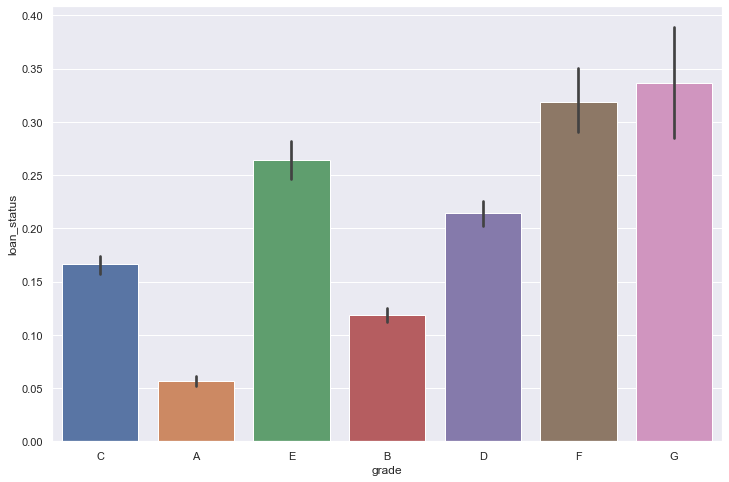

In [21]:
# plotting the graph b/w grade vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [22]:
# As the Grade increase the defaulter increased (Showing directly propotional) 

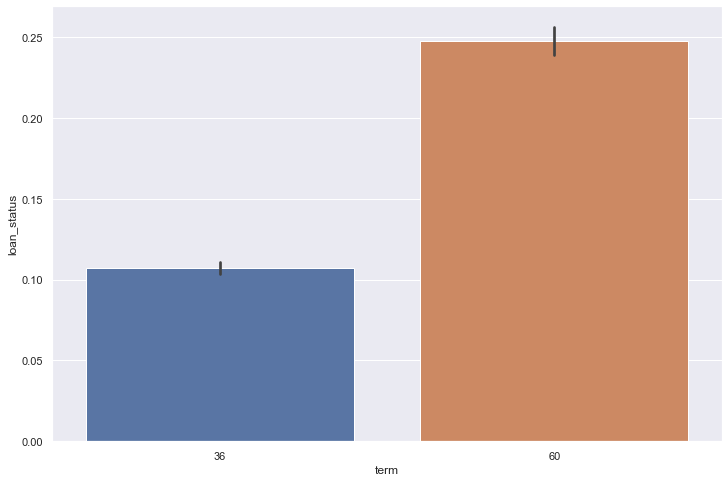

In [23]:
# plotting the graph b/w term vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='term', y='loan_status', data=df)
plt.show()

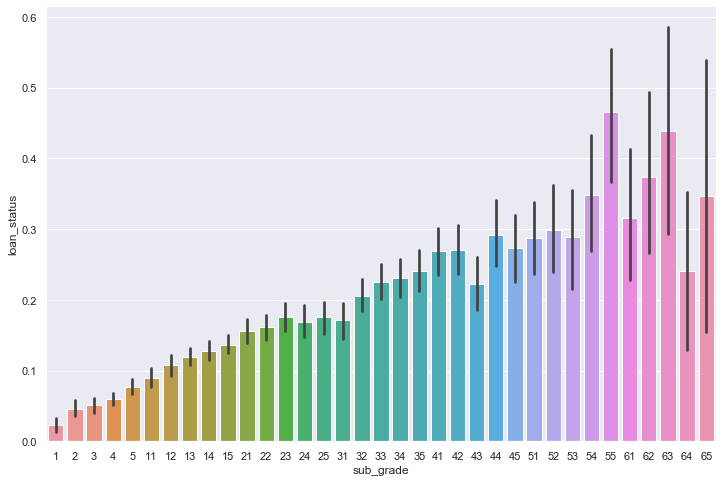

In [24]:
# plotting the graph b/w sub_grade vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

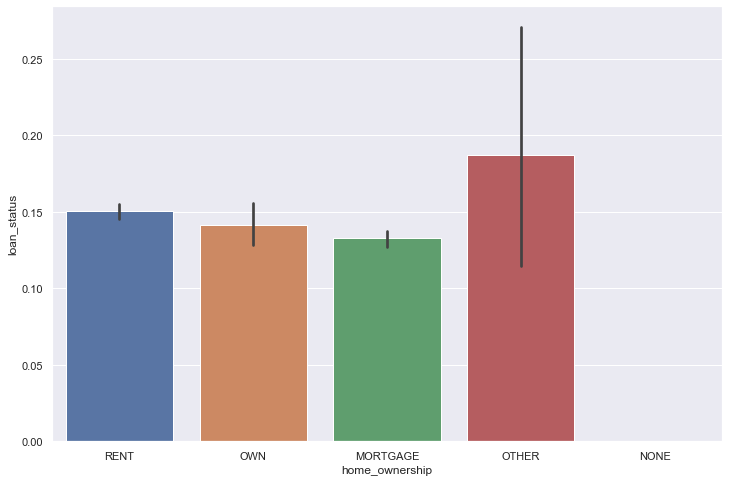

In [25]:
# plotting the graph b/w home_ownership vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()

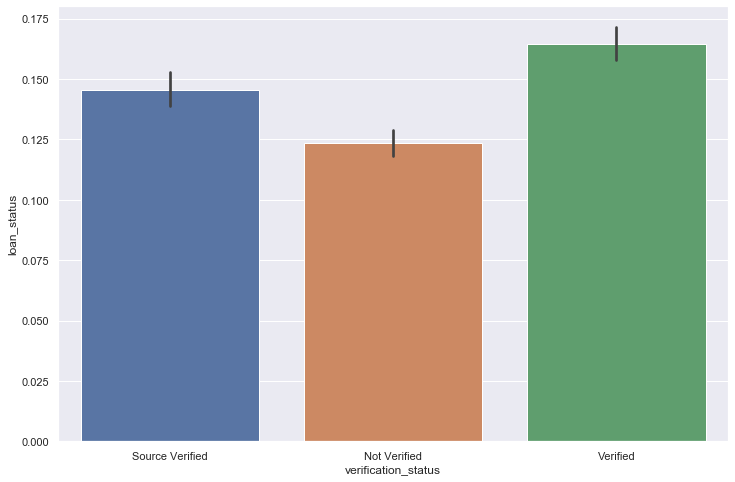

In [26]:
# plotting the graph b/w verification_status vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='verification_status', y='loan_status', data=df)
plt.show()

In [27]:
df['issue_d'].head()

1    Dec-11
3    Dec-11
5    Dec-11
6    Dec-11
7    Dec-11
Name: issue_d, dtype: object

In [28]:
# Convert Dec-11 to this type of data
# Analysis the data with respect to the data
from datetime import datetime
df['issue_d']=df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [29]:
df['issue_d'].head()

1   2011-12-01
3   2011-12-01
5   2011-12-01
6   2011-12-01
7   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [30]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

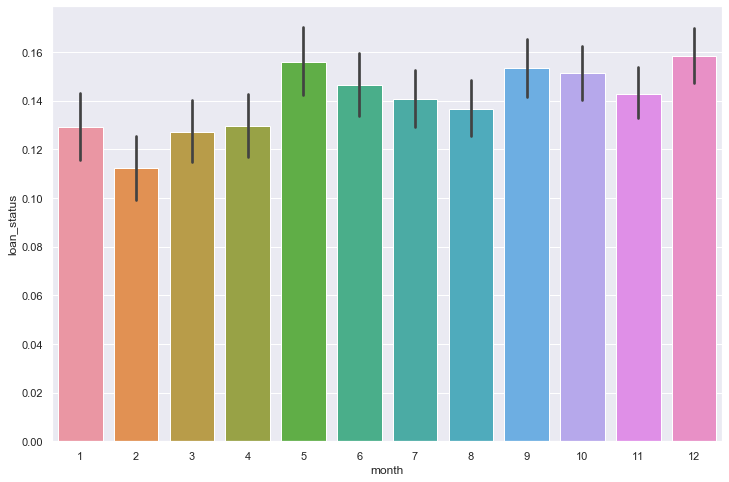

In [31]:
# plotting the graph b/w month vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='month', y='loan_status', data=df)
plt.show()

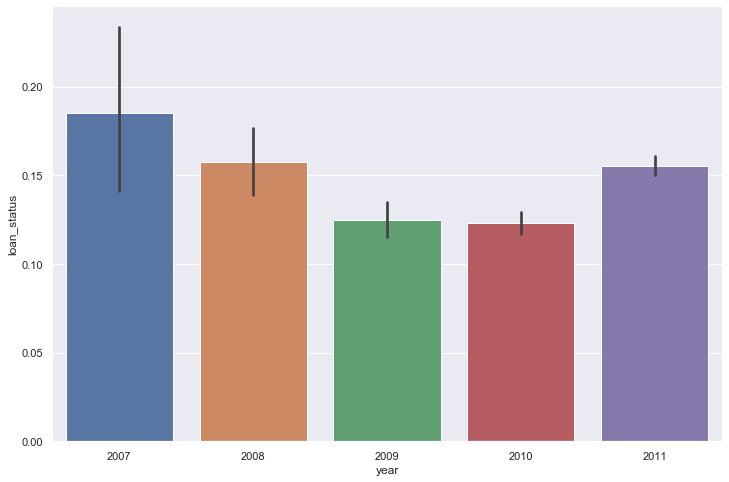

In [32]:
# plotting the graph b/w year vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='loan_status', data=df)
plt.show()

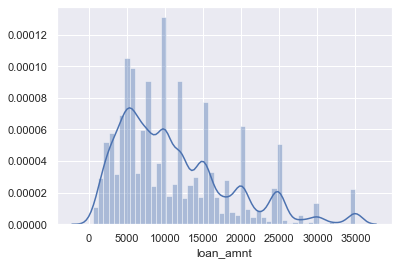

In [33]:
# See the amount of loan 
sns.distplot(df['loan_amnt'])
plt.show()

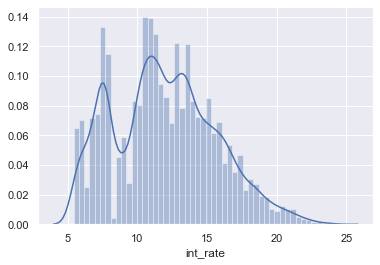

In [34]:
# See the interest on loan 
sns.distplot(df['int_rate'])
plt.show()

In [35]:
# Categorised the data in 3 part 1. High above 15 % 2. Medium above 10 % below 15% 3. Low below 10%
def interest_rate(i):
    if i>15:
        return 'High'
    elif (i<=15) & (i>10):
        return 'Medium'
    else:
        return 'low'
df['int_rate1']=df['int_rate'].apply(lambda x: interest_rate(x))

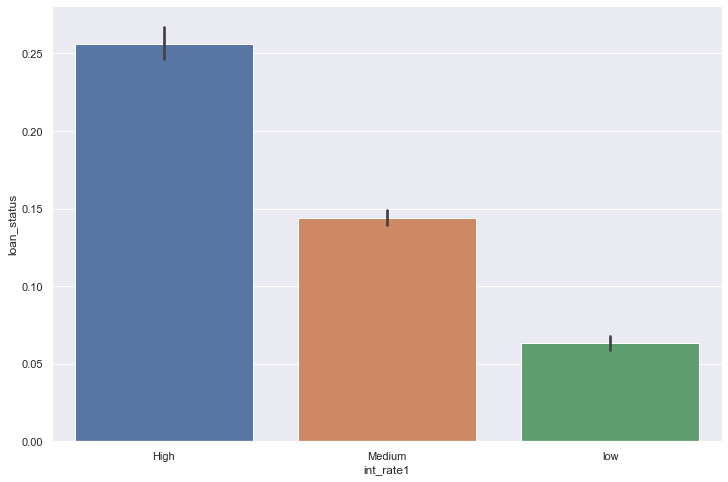

In [36]:
# plotting the graph b/w int_rate vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='int_rate1', y='loan_status', data=df)
plt.show()

In [37]:
Mi=df['loan_amnt'].min()
Ma=df['loan_amnt'].max()
print("Max Loan Amount",Mi)
print("Max Loan Amount",Ma)

Max Loan Amount 500
Max Loan Amount 35000


In [38]:
# Categorised the data in 3 part 1. Very High above 25000 % 2. High above 15000 below 25000 3. Medium above 10000 below 15000  4. Low below 10000
def Loan_amount(i):
    if i<10000:
        return 'low'
    elif (i<=15000) & (i>10000):
        return 'Medium'
    elif (i>15000) & (i<25000):
        return 'High'
    else:
        return 'Very High'
df['Loan_amount']=df['loan_amnt'].apply(lambda x: Loan_amount(x))

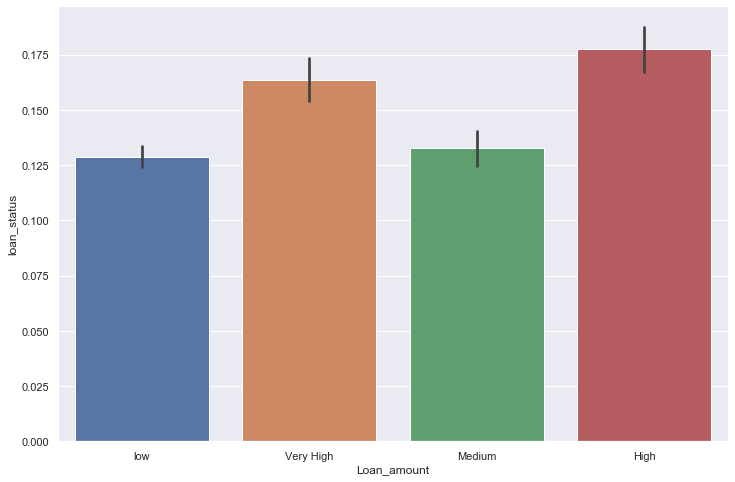

In [39]:
# plotting the graph b/w int_rate vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='Loan_amount', y='loan_status', data=df)
plt.show()

In [40]:
df['dti']
Mi=df['dti'].min()
Ma=df['dti'].max()
print("Max Loan Amount",Mi)
print("Max Loan Amount",Ma)

Max Loan Amount 0.0
Max Loan Amount 29.99


In [41]:
# Categorised the data in 3 part 1. High above 15  2. Medium above 10 below 15 3. Low below 10
def Loan_amount(i):
    if i<10:
        return 'low'
    elif (i<=15) & (i>10):
        return 'Medium'
    else:
        return 'High'
df['dti']=df['dti'].apply(lambda x: Loan_amount(x))

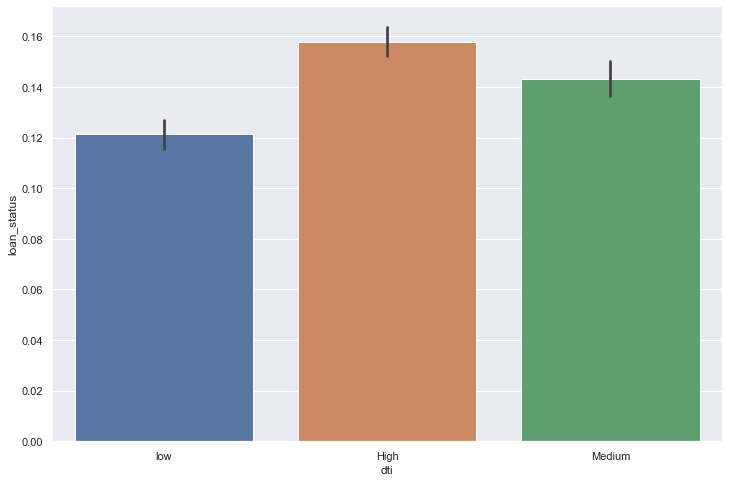

In [42]:
# plotting the graph b/w int_rate vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='dti', y='loan_status', data=df)
plt.show()

In [43]:
df['annual_inc']
Mi=df['annual_inc'].min()
Ma=df['annual_inc'].max()
print("Max Loan Amount",Mi)
print("Max Loan Amount",Ma)

Max Loan Amount 4000.0
Max Loan Amount 6000000.0


In [44]:
def annual_amnt(i):
    if i<50000:
        return 'low'
    elif (i>=50000) & (i<1000000):
        return 'Medium'
    else:
        return 'High'
df['annual_inc']=df['annual_inc'].apply(lambda x: annual_amnt(x))

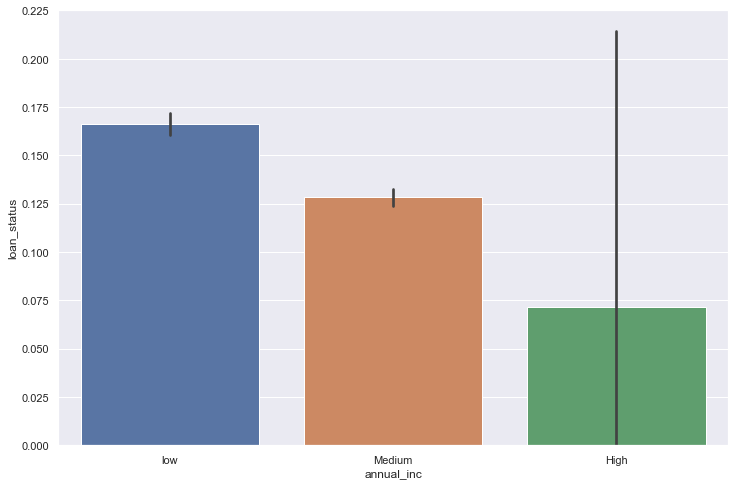

In [45]:
# plotting the graph b/w int_rate vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='annual_inc', y='loan_status', data=df)
plt.show()

In [46]:
df['emp_length']
Mi=df['emp_length'].min()
Ma=df['emp_length'].max()
print("Max Loan Amount",Mi)
print("Max Loan Amount",Ma)

Max Loan Amount 0.0
Max Loan Amount 10.0


In [47]:
# Categorised the data in 3 part 1. High above 10  2. Medium above 10 below 6 3. Low b/w 4 to 7
def year(i):
    if i<4:
        return 'low'
    elif (i>=4) & (i<=7):
        return 'Medium'
    elif (i>6) & (i<=10):
        return 'High'
df['emp_length']=df['emp_length'].apply(lambda x: year(x))

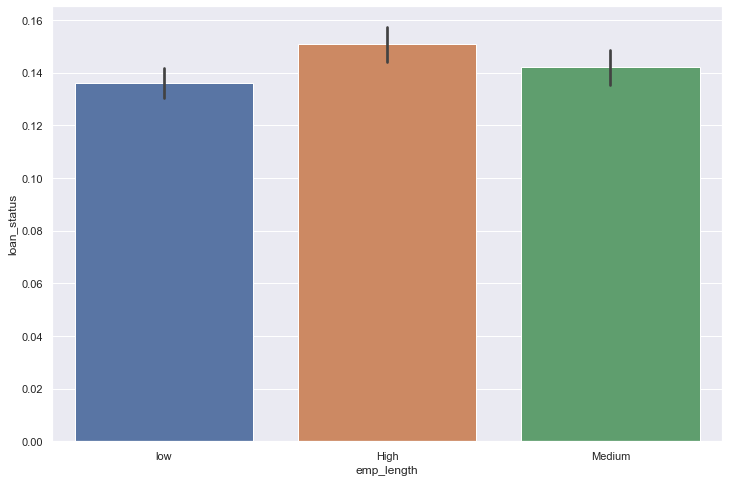

In [48]:
# plotting the graph b/w emp_length vs Loan_status
plt.figure(figsize=(12,8))
sns.barplot(x='emp_length', y='loan_status', data=df)
plt.show()

## EDA Bivariate

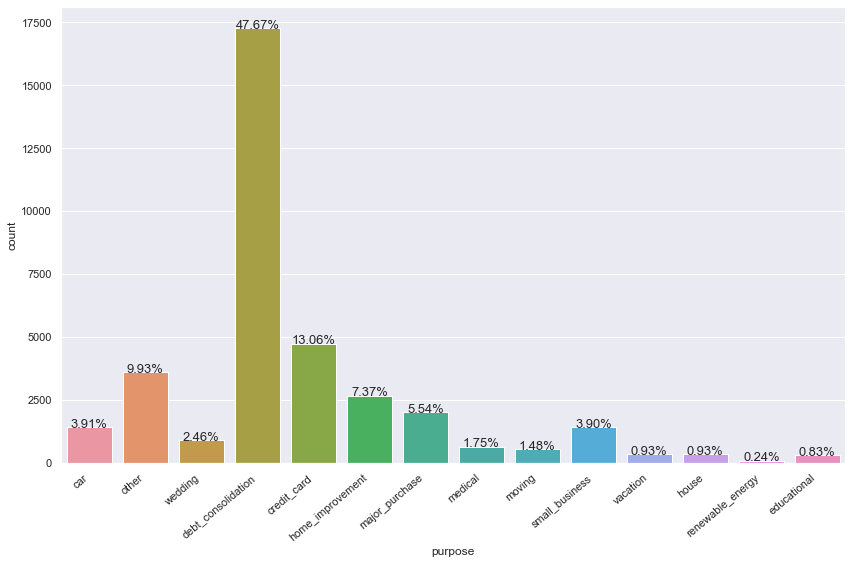

In [49]:
# This will show the people to take loan for which purpose and How much percent
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="purpose", data=df, orient="v")
total=len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height+3,'{:1.2f}%'.format(height/total*100),ha="center",fontsize=13)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

In [50]:
# Check the segment wise with high frequency
main_spending=['debt_consolidation','credit_card','home_improvement','other']
df = df[df['purpose'].isin(main_spending)]
df['purpose'].value_counts()

debt_consolidation    17251
credit_card            4727
other                  3593
home_improvement       2667
Name: purpose, dtype: int64

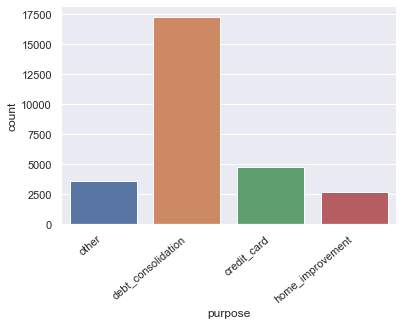

In [51]:
# Plot these four factor
ax = sns.countplot(x=df['purpose'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

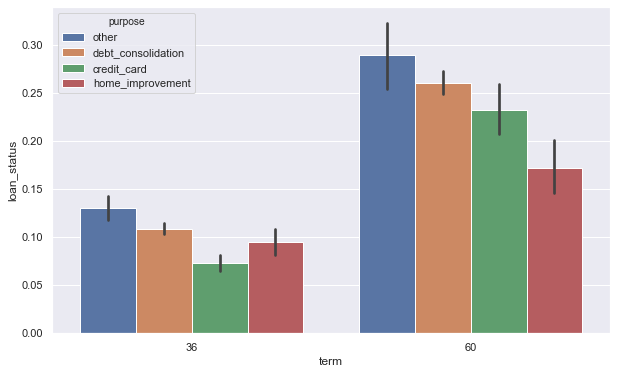

In [52]:
# Plot the barplot
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

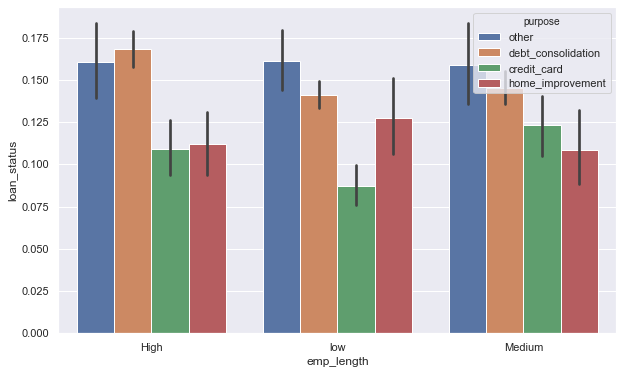

In [53]:
# Plot the barplot
plt.figure(figsize=[10, 6])
sns.barplot(x='emp_length', y="loan_status", hue='purpose', data=df)
plt.show()

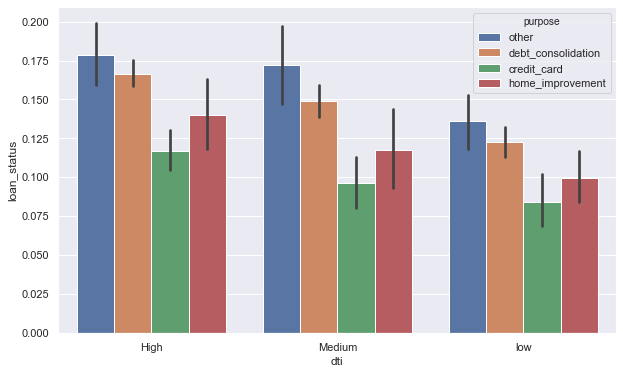

In [54]:
# Plot the barplot
plt.figure(figsize=[10, 6])
sns.barplot(x='dti', y="loan_status", hue='purpose', data=df)
plt.show()

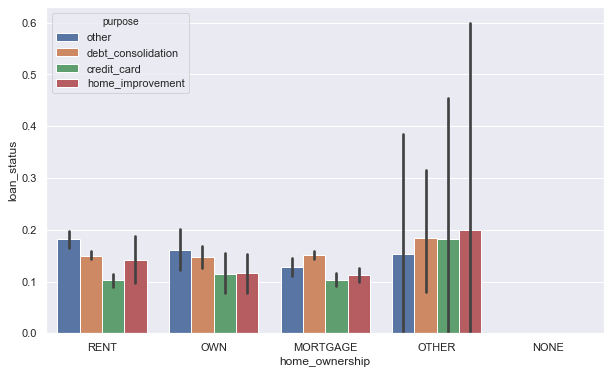

In [55]:
# Plot the barplot
plt.figure(figsize=[10, 6])
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=df)
plt.show()

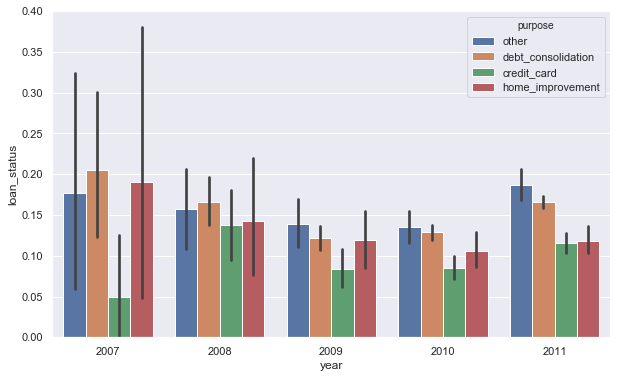

In [56]:
# Plot the barplot
plt.figure(figsize=[10, 6])
sns.barplot(x='year', y="loan_status", hue='purpose', data=df)
plt.show()

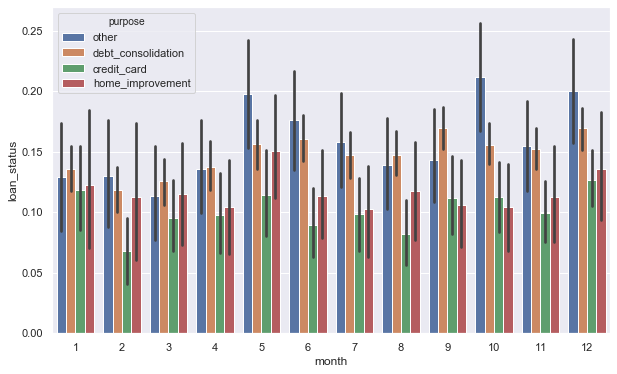

In [57]:
# Plot the barplot
plt.figure(figsize=[10, 6])
sns.barplot(x='month', y="loan_status", hue='purpose', data=df)
plt.show()

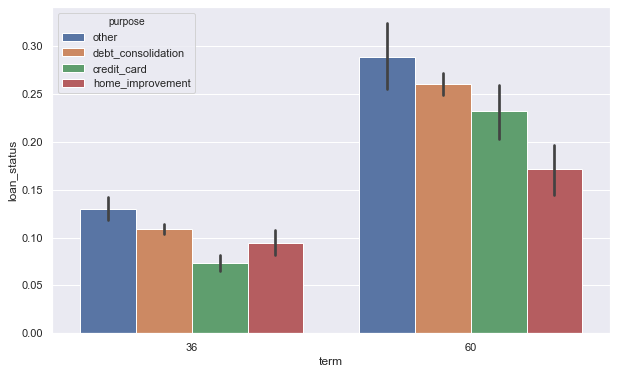

In [58]:
# Plot the barplot
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

In [59]:
# Conclusion Defaulter increase on various factor